In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

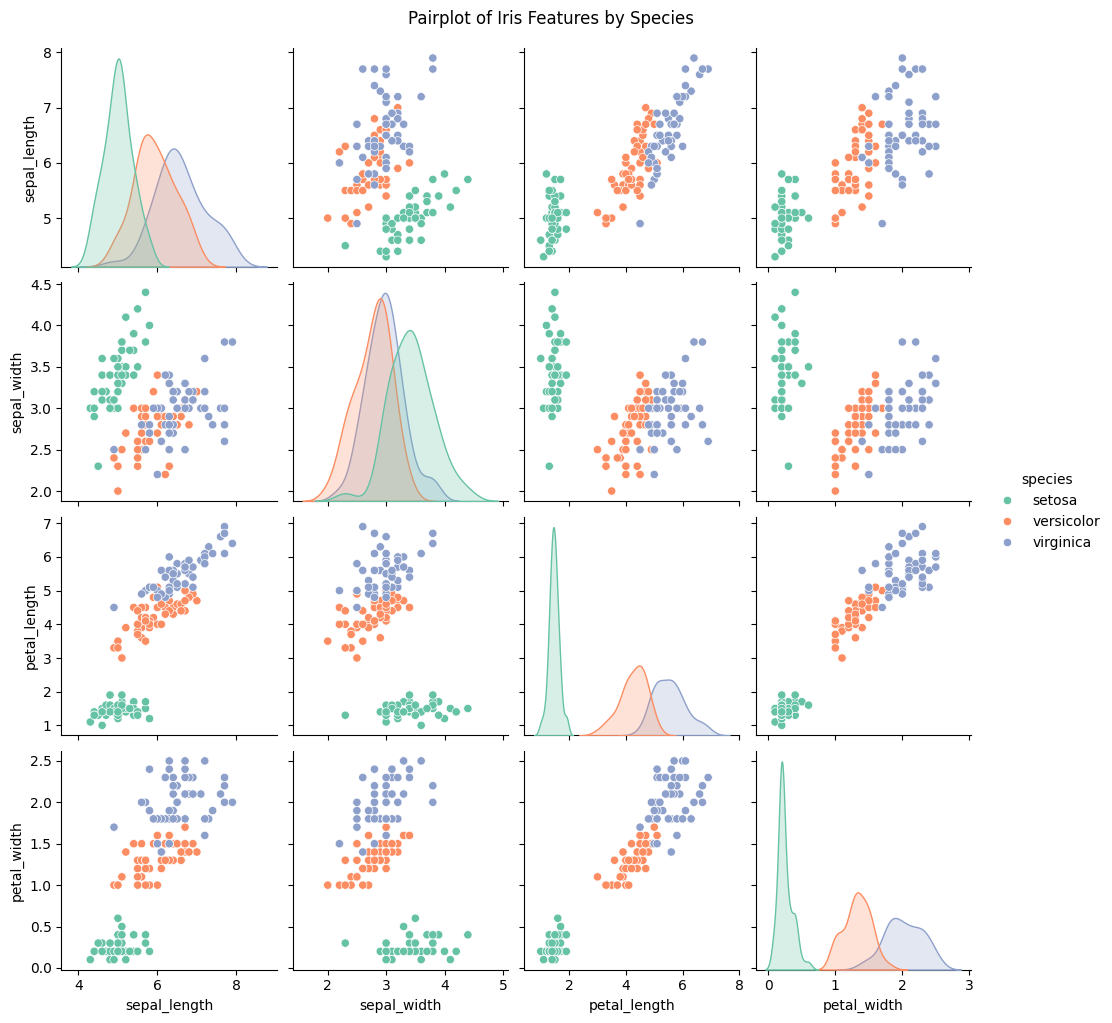

In [8]:
sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

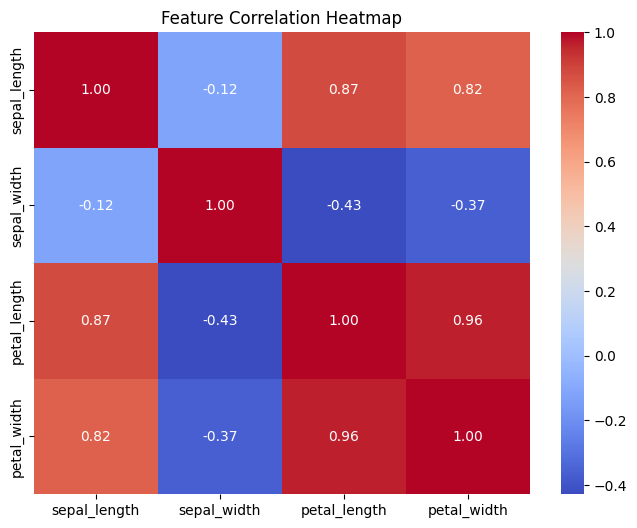

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

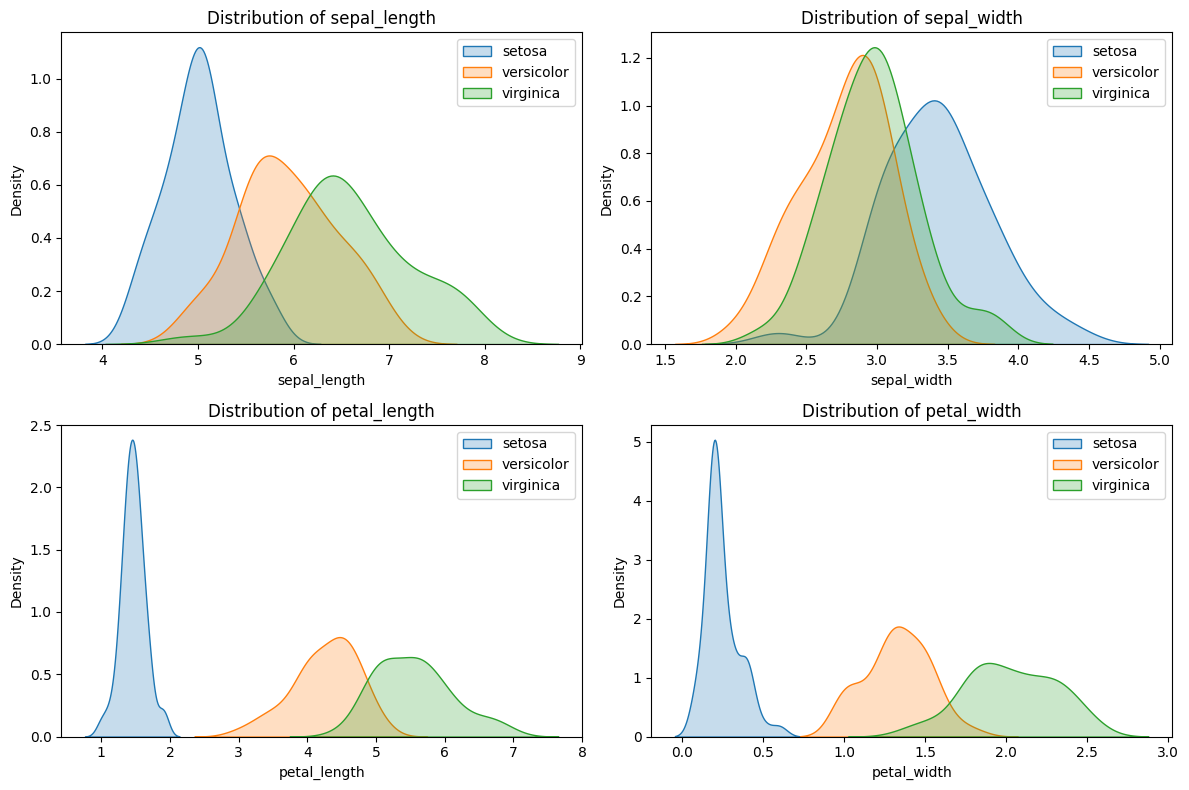

In [10]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    for species in df['species'].unique():
        sns.kdeplot(df[df['species'] == species][col], label=species, fill=True)
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()
plt.show()

In [11]:
X = df.drop('species', axis=1)
y = df['species']

In [12]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [18]:
scaled_X_train = scaler.transform(X_train)

In [19]:
scaled_X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [21]:
model = Sequential()
model.add(Input(shape=([4,])))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(patience=10)

In [24]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3667 - loss: 1.1677 - val_accuracy: 0.3333 - val_loss: 1.1116
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3031 - loss: 1.1891 - val_accuracy: 0.3333 - val_loss: 1.1091
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3323 - loss: 1.1907 - val_accuracy: 0.3333 - val_loss: 1.1068
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3281 - loss: 1.1909 - val_accuracy: 0.3333 - val_loss: 1.1047
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3010 - loss: 1.1631 - val_accuracy: 0.3333 - val_loss: 1.1025
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3656 - loss: 1.1358 - val_accuracy: 0.3333 - val_loss: 1.1006
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3156 - loss: 1.1608 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3344 - loss: 1.1523 - val_accuracy: 0.3333 - val_loss:

In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.333333,1.177957,0.333333,1.111613
1,0.333333,1.173663,0.333333,1.109129
2,0.333333,1.169180,0.333333,1.106831
3,0.333333,1.164961,0.333333,1.104660
4,0.333333,1.160591,0.333333,1.102549
...,...,...,...,...
295,0.816667,0.416252,0.900000,0.454495
296,0.816667,0.415556,0.900000,0.453678
297,0.833333,0.414772,0.900000,0.452550
298,0.833333,0.414083,0.900000,0.451421


<Axes: >

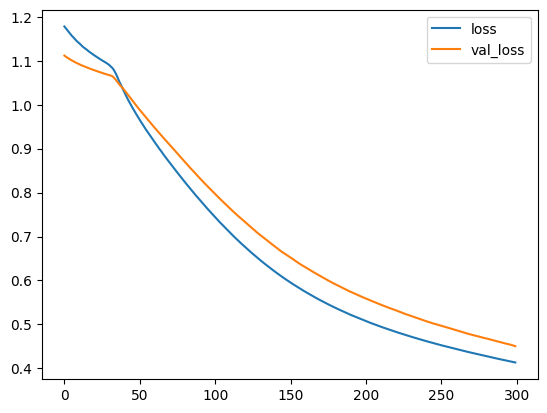

In [27]:
metrics[['loss','val_loss']].plot()

<Axes: >

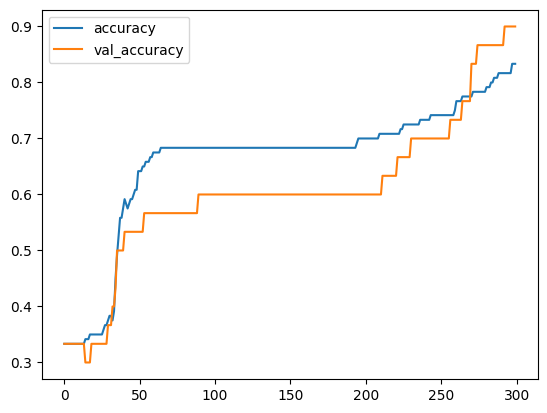

In [28]:
metrics[['accuracy','val_accuracy']].plot()

In [29]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.4503932595252991, 0.8999999761581421]

In [30]:
epochs = len(metrics)

In [31]:
scaled_X = scaler.fit_transform(X)

In [32]:
model = Sequential()
model.add(Input(shape=([4,])))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3413 - loss: 1.0754  
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3491 - loss: 1.0801 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3248 - loss: 1.0751 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3538 - loss: 1.0635 
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3473 - loss: 1.0614 
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3399 - loss: 1.0642 
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3129 - loss: 1.0686 
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3612 - loss: 1.0500 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3751 - loss: 1.0434 
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3638 - loss: 1.0464 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3351 - loss: 1.0532 
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3343 - lo

In [34]:
model.save('../models/iris_model.keras')

In [35]:
import joblib

In [36]:
joblib.dump(scaler,'../models/iris_scaler.pkl')

['../models/iris_scaler.pkl']

In [37]:
from tensorflow.keras.models import load_model

In [38]:
flower_model = load_model('../models/iris_model.keras')
flower_scaler = joblib.load('../models/iris_scaler.pkl')

In [39]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [40]:
flower_example = {
    "sepal_length": 5.1,
    "sepal_width": 3.5,
    "petal_length": 1.4,
    "petal_width": 0.2
}

In [41]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [42]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
def return_prediction(model, scaler, sample_json):
    import pandas as pd
    import numpy as np

    
    flower = pd.DataFrame([sample_json])
    flower = scaler.transform(flower)

    classes = np.array(['setosa', 'versicolor', 'virginica'])

    class_ind = np.argmax(model.predict(flower), axis=-1)

    return classes[class_ind[0]]

In [44]:
prediction = return_prediction(flower_model, flower_scaler, flower_example)
print("Predicted flower class:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted flower class: setosa
